## Import library

In [1]:
# Data processing, JSON-handling, & visualization libraries
import pandas as pd
import json
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Sklearn libraries, preprocessing steps, & decision tree model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer



### Import dataset

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np

PROC = Path("../data/processed")
df = pd.read_csv(PROC / "8_biz_merged_2019.csv")

In [3]:
# take a quick look
print(df.shape)       # rows, columns
print(df.columns)     # column names
df.head()             # first 5 rows


(36261, 82)
Index(['business_id', 'city', 'state', 'latitude', 'longitude', 'review_count',
       'is_open', 'review_count_log1p', 'attr_ByAppointmentOnly',
       'attr_BusinessAcceptsCreditCards', 'attr_BikeParking',
       'attr_RestaurantsPriceRange2', 'attr_RestaurantsTakeOut',
       'attr_RestaurantsDelivery', 'attr_Caters', 'attr_WiFi',
       'attr_WheelchairAccessible', 'attr_HappyHour', 'attr_OutdoorSeating',
       'attr_HasTV', 'attr_RestaurantsReservations', 'attr_DogsAllowed',
       'attr_Alcohol', 'attr_GoodForKids', 'attr_RestaurantsAttire',
       'attr_RestaurantsTableService', 'attr_RestaurantsGoodForGroups',
       'attr_DriveThru', 'attr_NoiseLevel', 'attr_Smoking',
       'total_weekly_hours', 'days_open', 'weekend_hours', 'avg_daily_hours',
       'has_hours_info', 'cat__Sandwiches', 'cat__American (Traditional)',
       'cat__Pizza', 'cat__Fast Food', 'cat__Breakfast & Brunch',
       'cat__American (New)', 'cat__Burgers', 'cat__Mexican', 'cat__Italian',
    

,business_id,city,state,latitude,longitude,review_count,is_open,review_count_log1p,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,...,city_Sparks,city_Tampa,city_Tucson,city_Wilmington,rev_count_2019,avg_stars_2019,first_review_2019,last_review_2019,rl_word_mean,rl_share_short24
0,MTSW4McQd7CbVtyjqoe9mw,Philadelphia,PA,39.955505,-75.155564,80.0,1,4.394449,False,False,...,0.0,0.0,0.0,0.0,20,4.550000,2019-03-12 17:04:09,2021-11-01 18:22:07,81.450000,0.05
1,CF33F8-E6oudUQ46HnavjQ,Ashland City,TN,36.269593,-87.058943,6.0,1,1.945910,False,True,...,0.0,0.0,0.0,0.0,3,1.333333,2020-06-26 19:22:36,2021-03-06 07:18:00,70.000000,0.00
2,bBDDEgkFA1Otx9Lfe7BZUQ,Nashville,TN,36.208102,-86.768170,10.0,1,2.397895,False,True,...,0.0,0.0,0.0,0.0,5,1.800000,2019-01-05 01:28:55,2021-04-15 19:16:33,111.200000,0.00
3,eEOYSgkmpB90uNA7lDOMRA,Tampa Bay,FL,27.955269,-82.456320,10.0,1,2.397895,NaN,NaN,...,0.0,0.0,0.0,0.0,8,4.250000,2019-01-16 18:22:34,2022-01-03 01:18:29,91.875000,0.00
4,il_Ro8jwPlHresjw9EGmBg,Indianapolis,IN,39.637133,-86.127217,28.0,1,3.367296,NaN,True,...,0.0,0.0,0.0,0.0,12,2.250000,2019-01-01 19:58:17,2021-04-22 13:58:42,97.833336,0.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36261 entries, 0 to 36260
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   business_id                      36261 non-null  object 
 1   city                             36261 non-null  object 
 2   state                            36261 non-null  object 
 3   latitude                         36261 non-null  float64
 4   longitude                        36261 non-null  float64
 5   review_count                     36261 non-null  float64
 6   is_open                          36261 non-null  int64  
 7   review_count_log1p               36261 non-null  float64
 8   attr_ByAppointmentOnly           3139 non-null   object 
 9   attr_BusinessAcceptsCreditCards  31372 non-null  object 
 10  attr_BikeParking                 26853 non-null  object 
 11  attr_RestaurantsPriceRange2      29672 non-null  float64
 12  attr_RestaurantsTa

## Type coercion : Confirm type of dataset for each feature

In [5]:
# import pandas as pd
# import numpy as np

# # --- 0) Helper: normalize obvious "missing" tokens to NaN
# MISSING_TOKENS = {"", " ", "NA", "N/A", "na", "n/a", "None", "null", "NULL"}

# def normalize_missing(s):
#     if pd.isna(s):
#         return np.nan
#     s_str = str(s).strip()
#     return np.nan if s_str in MISSING_TOKENS else s

# df = df.applymap(normalize_missing)

# # --- 1) Keep these as object (per your preference)
# # (Do nothing)
# # df[['business_id','city','state']] remain object

# # --- 2) One-hot (dummy) columns -> int8
# city_dummy_cols = [c for c in df.columns if c.startswith('city_')]
# cat_dummy_cols  = [c for c in df.columns if c.startswith('cat__')]
# df[city_dummy_cols + cat_dummy_cols] = df[city_dummy_cols + cat_dummy_cols].apply(
#     pd.to_numeric, errors='coerce'
# ).fillna(0).astype('int8')



# # --- 3) Binary attributes -> boolean (nullable)
# # Seen in your sample: TRUE/FALSE/Yes/No, sometimes blank.
# binary_attr_cols = [
#     'attr_ByAppointmentOnly',
#     'attr_BusinessAcceptsCreditCards',
#     'attr_BikeParking',
#     'attr_RestaurantsTakeOut',
#     'attr_RestaurantsDelivery',
#     'attr_Caters',
#     'attr_WheelchairAccessible',
#     'attr_HappyHour',
#     'attr_OutdoorSeating',
#     'attr_HasTV',
#     'attr_RestaurantsReservations',
#     'attr_DogsAllowed',
#     'attr_GoodForKids',
#     'attr_RestaurantsTableService',
#     'attr_RestaurantsGoodForGroups',
#     'attr_DriveThru'
# ]

# BOOL_MAP = {
#     'TRUE': True, 'True': True, 'true': True, 'Yes': True, 'yes': True, '1': True, 1: True,
#     'FALSE': False, 'False': False, 'false': False, 'No': False, 'no': False, '0': False, 0: False
# }

# for col in binary_attr_cols:
#     if col in df.columns:
#         df[col] = df[col].map(BOOL_MAP).astype('boolean')

# # Special: is_open is a flag -> boolean
# if 'is_open' in df.columns:
#     df['is_open'] = df['is_open'].map(BOOL_MAP).astype('boolean')

# # --- 4) Multi-class categorical attrs (coerce to category)
# # Based on your sample values:
# # - WiFi: free/paid/no
# # - Alcohol: full_bar/beer_and_wine (blank means unknown)
# # - RestaurantsAttire: casual (others may appear)
# # - NoiseLevel: quiet/average/loud/very_loud
# # - Smoking: may be blank or 'no'/'yes'/'outdoor' in some datasets
# # - attr_RestaurantsPriceRange2 : 1,2,3,4

# if 'attr_WiFi' in df.columns:
#     wifi_cats = ['no', 'free', 'paid']  # put in a logical order
#     df['attr_WiFi'] = df['attr_WiFi'].str.strip().str.lower()
#     df['attr_WiFi'] = pd.Categorical(df['attr_WiFi'].where(df['attr_WiFi'].isin(wifi_cats)), categories=wifi_cats)

# if 'attr_Alcohol' in df.columns:
#     alcohol_cats = ['beer_and_wine', 'full_bar']
#     s = df['attr_Alcohol'].astype(str).str.strip().str.lower()
#     s = s.where(s.isin(alcohol_cats))  # unknowns -> NaN
#     df['attr_Alcohol'] = pd.Categorical(s, categories=alcohol_cats)

# if 'attr_RestaurantsAttire' in df.columns:
#     # Keep flexible: we know 'casual' exists; allow others if present
#     s = df['attr_RestaurantsAttire'].astype(str).str.strip().str.lower()
#     # If you want a fixed set, define attire_cats = ['casual', 'dressy', 'formal']
#     df['attr_RestaurantsAttire'] = s.astype('category')

# if 'attr_NoiseLevel' in df.columns:
#     noise_cats = ['quiet', 'average', 'loud', 'very_loud']
#     s = df['attr_NoiseLevel'].astype(str).str.strip().str.lower()
#     s = s.where(s.isin(noise_cats))
#     df['attr_NoiseLevel'] = pd.Categorical(s, categories=noise_cats, ordered=True)

# if 'attr_Smoking' in df.columns:
#     # Seen blanks mostly; support common possibilities
#     smoking_cats = ['no', 'yes', 'outdoor', 'separated']  # keep flexible
#     s = df['attr_Smoking'].astype(str).str.strip().str.lower()
#     s = s.where(s.isin(smoking_cats))
#     df['attr_Smoking'] = pd.Categorical(s, categories=smoking_cats)
    
# if 'attr_RestaurantsPriceRange2' in df.columns:
#     price_cats = [1, 2, 3, 4]
#     df['attr_RestaurantsPriceRange2'] = pd.Categorical(
#         pd.to_numeric(df['attr_RestaurantsPriceRange2'], errors='coerce'),
#         categories=price_cats,
#         ordered=True
#     )


# # --- 5) Numeric features
# numeric_cols = [
#     'latitude', 'longitude',
#     'review_count', 'review_count_log1p',
#     'rev_count_2019', 'avg_stars_2019'
#     'total_weekly_hours', 'days_open', 'weekend_hours', 'avg_daily_hours', 'has_hours_info'
# ]
# for col in numeric_cols:
#     if col in df.columns:
#         df[col] = pd.to_numeric(df[col], errors='coerce')


# # --- 6) Dates
# date_cols = ['first_review_2019', 'last_review_2019']
# for col in date_cols:
#     if col in df.columns:
#         df[col] = pd.to_datetime(df[col], errors='coerce', infer_datetime_format=True)

# # --- 7) Quick sanity checks
# print(df.dtypes)
# print("\nValue checks:")
# for col in ['attr_WiFi','attr_Alcohol','attr_RestaurantsAttire','attr_NoiseLevel','attr_Smoking']:
#     if col in df.columns:
#         print(f"\n{col} -> categories:", getattr(df[col], 'cat', None).categories if hasattr(df[col], 'cat') else df[col].unique())
        



In [6]:
import pandas as pd
import numpy as np

# --- 0) Helper: normalize obvious "missing" tokens to NaN
MISSING_TOKENS = {"", " ", "NA", "N/A", "na", "n/a", "None", "null", "NULL"}

def normalize_missing(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    return np.nan if s in MISSING_TOKENS else x

# Avoid deprecated DataFrame.applymap by mapping per-column
df = df.apply(lambda col: col.map(normalize_missing))

# --- 1) Keep these as object (no change)
# df[['business_id','city','state']] remain object

# --- 2) One-hot (dummy) columns you ALREADY have -> int8
# (Only categories; you said to drop city_*.)
cat_dummy_cols = [c for c in df.columns if c.startswith('cat__')]
if cat_dummy_cols:
    df[cat_dummy_cols] = (
        df[cat_dummy_cols]
        .apply(pd.to_numeric, errors='coerce')
        .fillna(0)
        .astype('int8')
    )

# --- 3) Binary attributes -> boolean (nullable)
binary_attr_cols = [
    'attr_ByAppointmentOnly',
    'attr_BusinessAcceptsCreditCards',
    'attr_BikeParking',
    'attr_RestaurantsTakeOut',
    'attr_RestaurantsDelivery',
    'attr_Caters',
    'attr_WheelchairAccessible',
    'attr_HappyHour',
    'attr_OutdoorSeating',
    'attr_HasTV',
    'attr_RestaurantsReservations',
    'attr_DogsAllowed',
    'attr_GoodForKids',
    'attr_RestaurantsTableService',
    'attr_RestaurantsGoodForGroups',
    'attr_DriveThru'
]

BOOL_MAP = {
    'TRUE': True, 'True': True, 'true': True, 'Yes': True, 'yes': True,
    '1': True, 1: True, True: True,
    'FALSE': False, 'False': False, 'false': False, 'No': False, 'no': False,
    '0': False, 0: False, False: False
}

for col in binary_attr_cols:
    if col in df.columns:
        # map returns NaN for unknowns; cast to pandas nullable boolean
        df[col] = df[col].map(BOOL_MAP).astype('boolean')

# Special: is_open -> boolean
if 'is_open' in df.columns:
    df['is_open'] = df['is_open'].map(BOOL_MAP).astype('boolean')

# --- 4) Multi-class categorical attrs (cast to category)
# WiFi: free/paid/no
if 'attr_WiFi' in df.columns:
    wifi_cats = ['no', 'free', 'paid']
    s = df['attr_WiFi'].astype(str).str.strip().str.lower()
    df['attr_WiFi'] = pd.Categorical(s.where(s.isin(wifi_cats)), categories=wifi_cats)

# Alcohol: beer_and_wine/full_bar
if 'attr_Alcohol' in df.columns:
    alcohol_cats = ['beer_and_wine', 'full_bar']
    s = df['attr_Alcohol'].astype(str).str.strip().str.lower()
    df['attr_Alcohol'] = pd.Categorical(s.where(s.isin(alcohol_cats)), categories=alcohol_cats)

# RestaurantsAttire: keep flexible but categorical
if 'attr_RestaurantsAttire' in df.columns:
    attire_cats = ['casual', 'formal', 'dressy']
    s = df['attr_RestaurantsAttire'].astype(str).str.strip().str.lower()
    df['attr_RestaurantsAttire'] = pd.Categorical(
        s.where(s.isin(attire_cats)),
        categories=attire_cats
    )

# NoiseLevel: ordered
if 'attr_NoiseLevel' in df.columns:
    noise_cats = ['quiet', 'average', 'loud', 'very_loud']
    s = df['attr_NoiseLevel'].astype(str).str.strip().str.lower()
    df['attr_NoiseLevel'] = pd.Categorical(s.where(s.isin(noise_cats)),
                                           categories=noise_cats, ordered=True)

# Smoking: categories (many NaNs are fine)
if 'attr_Smoking' in df.columns:
    smoking_cats = ['no', 'yes', 'outdoor', 'separated']
    s = df['attr_Smoking'].astype(str).str.strip().str.lower()
    df['attr_Smoking'] = pd.Categorical(s.where(s.isin(smoking_cats)),
                                        categories=smoking_cats)

# Price range: ordered 1..4
if 'attr_RestaurantsPriceRange2' in df.columns:
    price = pd.to_numeric(df['attr_RestaurantsPriceRange2'], errors='coerce')
    df['attr_RestaurantsPriceRange2'] = pd.Categorical(price, categories=[1,2,3,4], ordered=True)

# --- 5) Numeric features (coerce)
numeric_cols = [
    'latitude', 'longitude',
    'review_count', 'review_count_log1p',
    'rev_count_2019', 'avg_stars_2019',
    'total_weekly_hours', 'days_open', 'weekend_hours', 'avg_daily_hours',
    'has_hours_info', 'rl_word_mean', 'rl_share_short24'
]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# --- 6) Dates
for col in ['first_review_2019', 'last_review_2019']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# --- 7) Hours block prep
hour_cols = ['total_weekly_hours', 'days_open', 'weekend_hours', 'avg_daily_hours']
if 'has_hours_info' in df.columns:
    # cast to nullable boolean if it isn't already
    if df['has_hours_info'].dtype != 'boolean':
        # treat >0 as True if it's numeric 0/1
        df['has_hours_info'] = df['has_hours_info'].astype('Int64').fillna(0).astype('boolean')

    mask_no_hours = ~df['has_hours_info'].fillna(False)
    # Force zeros where hours are unavailable
    for c in hour_cols:
        if c in df.columns:
            df.loc[mask_no_hours, c] = 0.0

# --- 6) Dates
date_cols = ['first_review_2019', 'last_review_2019']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce', infer_datetime_format=True)


# --- 8) Quick sanity checks
print(df.dtypes)
print("\nValue checks:")
for col in ['attr_WiFi','attr_Alcohol','attr_RestaurantsAttire','attr_NoiseLevel','attr_Smoking']:
    if col in df.columns and hasattr(df[col], 'cat'):
        print(f"{col} -> categories:", df[col].cat.categories)


business_id                  object
city                         object
state                        object
latitude                    float64
longitude                   float64
                          ...      
avg_stars_2019              float64
first_review_2019    datetime64[ns]
last_review_2019     datetime64[ns]
rl_word_mean                float64
rl_share_short24            float64
Length: 82, dtype: object

Value checks:
attr_WiFi -> categories: Index(['no', 'free', 'paid'], dtype='object')
attr_Alcohol -> categories: Index(['beer_and_wine', 'full_bar'], dtype='object')
attr_RestaurantsAttire -> categories: Index(['casual', 'formal', 'dressy'], dtype='object')
attr_NoiseLevel -> categories: Index(['quiet', 'average', 'loud', 'very_loud'], dtype='object')
attr_Smoking -> categories: Index(['no', 'yes', 'outdoor', 'separated'], dtype='object')


/var/folders/l_/bfn4zmvj11j3519tmtl4xcd40000gn/T/ipykernel_35193/3677287177.py:142: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[col] = pd.to_datetime(df[col], errors='coerce', infer_datetime_format=True)
/var/folders/l_/bfn4zmvj11j3519tmtl4xcd40000gn/T/ipykernel_35193/3677287177.py:142: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[col] = pd.to_datetime(df[col], errors='coerce', infer_datetime_format=True)


In [7]:
# Save cleaned dataframe to CSV
df.to_csv("../data/processed/11_biz_merged_clean.csv", index=False)
df.to_parquet("../data/processed/11_biz_merged_clean.parquet", index=False) # keep dtype setting


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36261 entries, 0 to 36260
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   business_id                      36261 non-null  object        
 1   city                             36261 non-null  object        
 2   state                            36261 non-null  object        
 3   latitude                         36261 non-null  float64       
 4   longitude                        36261 non-null  float64       
 5   review_count                     36261 non-null  float64       
 6   is_open                          36261 non-null  boolean       
 7   review_count_log1p               36261 non-null  float64       
 8   attr_ByAppointmentOnly           3139 non-null   boolean       
 9   attr_BusinessAcceptsCreditCards  31372 non-null  boolean       
 10  attr_BikeParking                 26853 non-null  boolean  

## Separate Data into Predictors (X) & Target Value (y)

In [9]:
# --- target (regression) ---
y = df["avg_stars_2019"].astype(float)

# --- columns to exclude from X (IDs, raw text, targets, date aggregates) ---
exclude = {
    "business_id", "city", "state",
    "avg_stars_2019", "review_count",
    "rev_count_2019", "first_review_2019", "last_review_2019",
}

# Keep only numeric columns, then drop excluded + city_* dummies
num_cols_all = df.select_dtypes(
    include=["int64", "category", "float64", "int8", "boolean", "int64", "int8"]
).columns.tolist()

X = (
    df[num_cols_all]
    .drop(columns=[c for c in exclude if c in df.columns], errors="ignore")
    .drop(columns=df.filter(regex="^city_").columns, errors="ignore")
)


cat_cols = df.select_dtypes(include=["category"]).columns
df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)

X = pd.concat([X, df_encoded], axis=1)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (36261, 67)
y shape: (36261,)


In [10]:
# Save cleaned dataframe to CSV
X.to_csv("../data/processed/12_cleanXy.csv", index=False)
X.to_parquet("../data/processed/12_cleanXy.parquet", index=False) # keep dtype setting

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36261 entries, 0 to 36260
Data columns (total 67 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   latitude                         36261 non-null  float64 
 1   longitude                        36261 non-null  float64 
 2   is_open                          36261 non-null  boolean 
 3   review_count_log1p               36261 non-null  float64 
 4   attr_ByAppointmentOnly           3139 non-null   boolean 
 5   attr_BusinessAcceptsCreditCards  31372 non-null  boolean 
 6   attr_BikeParking                 26853 non-null  boolean 
 7   attr_RestaurantsPriceRange2      29672 non-null  category
 8   attr_RestaurantsTakeOut          33187 non-null  boolean 
 9   attr_RestaurantsDelivery         31363 non-null  boolean 
 10  attr_Caters                      25596 non-null  boolean 
 11  attr_WiFi                        27525 non-null  category
 12  attr

## Extract continous, Ordinal & Nominal, boolean Categorical features

In [12]:


# Continuous numeric
continuous_cols = ["latitude", "longitude", "review_count_log1p", "rl_word_mean", "rl_share_short24", "total_weekly_hours", "days_open", "weekend_hours", "avg_daily_hours" ]

# Ordinal (ordered categories)
ordinal_cols = [
    "attr_RestaurantsPriceRange2",
    "attr_NoiseLevel",
    "attr_RestaurantsAttire"
]

# Nominal RAW categoricals that still need OHE
nominal_raw_cols = ["attr_WiFi", "attr_Alcohol", "attr_Smoking"]

# Already one-hot encoded (leave as-is)
#onehot_already_cols = [c for c in X.columns if c.startswith("cat__") or c.startswith("city_")]
onehot_already_cols = [c for c in X.columns if c.startswith("cat__")]

# Boolean flags
boolean_cols = X.select_dtypes(include=["boolean"]).columns.tolist()

print("continuous:", continuous_cols)
print("ordinal:", ordinal_cols)
print("nominal_raw:", nominal_raw_cols)
print("already_onehot:", len(onehot_already_cols), "cols")
print("boolean:", len(boolean_cols), "cols")


continuous: ['latitude', 'longitude', 'review_count_log1p', 'rl_word_mean', 'rl_share_short24', 'total_weekly_hours', 'days_open', 'weekend_hours', 'avg_daily_hours']
ordinal: ['attr_RestaurantsPriceRange2', 'attr_NoiseLevel', 'attr_RestaurantsAttire']
nominal_raw: ['attr_WiFi', 'attr_Alcohol', 'attr_Smoking']
already_onehot: 20 cols
boolean: 32 cols


## 2) Features pipeline

In [13]:
ordinal_pipe = Pipeline([
    ("encoder", OrdinalEncoder(
        categories=[
            [1, 2, 3, 4],                               # PriceRange
            ["quiet", "average", "loud", "very_loud"],  # Noise
            ["casual", "dressy", "formal"]              # Attire
        ],
        handle_unknown="use_encoded_value",
        unknown_value=-1,
        encoded_missing_value=-1 
    ))
])

nominal_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing",
                              keep_empty_features=True)),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

bool_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=False))
    # Optional: cast to float if a model dislikes bools:
    # ("to_float", FunctionTransformer(lambda a: a.astype(float)))
])


In [14]:
print(X[["attr_RestaurantsPriceRange2","attr_NoiseLevel","attr_RestaurantsAttire"]].isna().sum())


attr_RestaurantsPriceRange2     6589
attr_NoiseLevel                12587
attr_RestaurantsAttire         10843
dtype: int64


In [15]:
from sklearn.compose import ColumnTransformer

preproc = ColumnTransformer(
    transformers=[
        ("cont",  numeric_pipe,       continuous_cols),
        ("ord",   ordinal_pipe,       ordinal_cols),
        ("nom",   nominal_pipe,       nominal_raw_cols),
        ("bool",  bool_pipe,          boolean_cols),
        ("onehot_already", "passthrough", onehot_already_cols),
    ],
    remainder="drop"
)


In [16]:
preproc

,transformers,"[('cont', ...), ('ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [17]:


preproc.set_output(transform="pandas")
processed_df = preproc.fit_transform(X)
for col in ["ord__attr_RestaurantsPriceRange2","ord__attr_NoiseLevel","ord__attr_RestaurantsAttire"]:
    if col in processed_df.columns:
        print(col, "min/max:", processed_df[col].min(), processed_df[col].max(),
              "| count(-1):", (processed_df[col] == -1).sum())


ord__attr_RestaurantsPriceRange2 min/max: -1.0 3.0 | count(-1): 6589
ord__attr_NoiseLevel min/max: -1.0 3.0 | count(-1): 12587
ord__attr_RestaurantsAttire min/max: -1.0 2.0 | count(-1): 10843


In [18]:
preproc = ColumnTransformer(
    transformers=[
        ("cont",  numeric_pipe,        continuous_cols),
        ("ord",   ordinal_pipe,        ordinal_cols),
        ("nom",   nominal_pipe,        nominal_raw_cols),
        ("bool",  bool_pipe,           boolean_cols),
        ("onehot_already", "passthrough", onehot_already_cols),
    ],
    remainder="drop"
)
preproc

,transformers,"[('cont', ...), ('ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


## Viewing the Processed Dataset

In [19]:
# Export processed array as readable Pandas DataFrame
preproc.set_output(transform="pandas")

# Fit & transform (encode & scale) features into processed data
processed_df = preproc.fit_transform(X)

# View first-7 observations from processed data
processed_df.head(7)


,cont__latitude,cont__longitude,cont__review_count_log1p,cont__rl_word_mean,cont__rl_share_short24,cont__total_weekly_hours,cont__days_open,cont__weekend_hours,cont__avg_daily_hours,ord__attr_RestaurantsPriceRange2,...,onehot_already__cat__Seafood,onehot_already__cat__Chinese,onehot_already__cat__Salad,onehot_already__cat__Chicken Wings,onehot_already__cat__Cafes,onehot_already__cat__Delis,onehot_already__cat__Caterers,onehot_already__cat__Specialty Food,onehot_already__cat__Bakeries,onehot_already__cat__Desserts
0,0.475021,0.989187,0.364519,0.120875,0.050000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.333718,0.727110,0.021590,0.098947,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.331361,0.733512,0.084892,0.177849,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.014982,0.828446,0.084892,0.140839,0.000000,0.0,0.0,0.0,0.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.462816,0.747624,0.220662,0.152250,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0.013481,0.821750,0.395426,0.022343,0.666667,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
6,0.474961,0.989459,0.520104,0.182154,0.060345,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


## Save to PKL file

In [54]:
# Save the *fitted* preprocessor
import joblib
joblib.dump(preproc, "../data/processed/13_processed_df.pkl")

['../data/processed/13_processed_df.pkl']

In [53]:
processed_df.to_csv("../data/processed/13_processed_df.csv", index=False)
processed_df.to_parquet("../data/processed/13_processed_df.parquet", index=False) # keep dtype setting

In [21]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36261 entries, 0 to 36260
Data columns (total 72 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   cont__latitude                               36261 non-null  float64
 1   cont__longitude                              36261 non-null  float64
 2   cont__review_count_log1p                     36261 non-null  float64
 3   cont__rl_word_mean                           36261 non-null  float64
 4   cont__rl_share_short24                       36261 non-null  float64
 5   cont__total_weekly_hours                     36261 non-null  float64
 6   cont__days_open                              36261 non-null  float64
 7   cont__weekend_hours                          36261 non-null  float64
 8   cont__avg_daily_hours                        36261 non-null  float64
 9   ord__attr_RestaurantsPriceRange2             36261 non-null  float64
 10

In [22]:
for col in ["ord__attr_RestaurantsPriceRange2", 
            "ord__attr_NoiseLevel", 
            "ord__attr_RestaurantsAttire"]:
    if col in processed_df.columns:
        print(col, "->", processed_df[col].unique())


ord__attr_RestaurantsPriceRange2 -> [ 0. -1.  1.  2.  3.]
ord__attr_NoiseLevel -> [-1.  1.  0.  2.  3.]
ord__attr_RestaurantsAttire -> [-1.  0.  1.  2.]


PriceRange2: [1,2,3,4] → [0,1,2,3]

NoiseLevel: ["quiet","average","loud","very_loud"] → [0,1,2,3]

Attire: ["casual","dressy","formal"] → [0,1,2]

## check avg star value range

In [23]:
df["avg_stars_2019"].describe()


count    36261.000000
mean         3.495244
std          0.968450
min          1.000000
25%          2.891892
50%          3.714286
75%          4.244344
max          5.000000
Name: avg_stars_2019, dtype: float64

## Implement MLflow

In [24]:
# !pip install mlflow
# !pip install -U mlflow xgboost

## Import Library

In [25]:
import mlflow, mlflow.sklearn, mlflow.xgboost  # xgboost import is harmless if unused
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    median_absolute_error, explained_variance_score,
    accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, log_loss, brier_score_loss,
    RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
)
import numpy as np
import matplotlib.pyplot as plt
import tempfile, os

# def eval_regression(y_true, y_pred):
#     rmse = mean_squared_error(y_true, y_pred, squared=False)
#     return {
#         "mae":  float(mean_absolute_error(y_true, y_pred)),
#         "rmse": float(rmse),
#         "r2":   float(r2_score(y_true, y_pred)),
#         "medae": float(median_absolute_error(y_true, y_pred)),
#         "explained_variance": float(explained_variance_score(y_true, y_pred)),
#     }

def eval_classification(y_true, y_proba, thresh=0.5):
    y_pred = (y_proba >= thresh).astype(int)
    return {
        "accuracy":          float(accuracy_score(y_true, y_pred)),
        "balanced_accuracy": float(balanced_accuracy_score(y_true, y_pred)),
        "precision":         float(precision_score(y_true, y_pred, zero_division=0)),
        "recall":            float(recall_score(y_true, y_pred, zero_division=0)),
        "f1":                float(f1_score(y_true, y_pred, zero_division=0)),
        "roc_auc":           float(roc_auc_score(y_true, y_proba)),
        "pr_auc":            float(average_precision_score(y_true, y_proba)),
        "log_loss":          float(log_loss(y_true, y_proba)),
        "brier":             float(brier_score_loss(y_true, y_proba)),
        "threshold":         float(thresh),
    }

def log_fig(fig, name):
    with tempfile.TemporaryDirectory() as d:
        p = os.path.join(d, f"{name}.png")
        fig.savefig(p, bbox_inches="tight", dpi=150)
        mlflow.log_artifact(p, artifact_path="figures")
    plt.close(fig)

# # -------------------------
# # 1) REGRESSION (ElasticNet / RF / XGBRegressor)
# # -------------------------
# from sklearn.linear_model import ElasticNet
# from sklearn.pipeline import Pipeline

# reg_pipe = Pipeline([
#     ("prep", preproc),
#     ("model", ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42))
# ])

# X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# with mlflow.start_run(run_name="reg_elasticnet"):
#     mlflow.sklearn.autolog(log_models=True)
#     reg_pipe.fit(X_tr, y_tr)
#     y_hat = reg_pipe.predict(X_te)
#     m = eval_regression(y_te, y_hat)
#     mlflow.log_metrics(m)
#     # (Optional) Predicted vs Actual plot
#     fig, ax = plt.subplots(figsize=(5,5))
#     ax.scatter(y_te, y_hat, s=5, alpha=0.4)
#     lims = [1,5]; ax.plot(lims, lims, ls="--"); ax.set_xlim(lims); ax.set_ylim(lims)
#     ax.set_xlabel("Actual avg_stars_2019"); ax.set_ylabel("Predicted"); ax.set_title("Predicted vs Actual")
#     log_fig(fig, "reg_pred_vs_actual")

# -------------------------
# # 2) CLASSIFICATION (Logistic / RF / XGBClassifier)
# # -------------------------
# from sklearn.linear_model import LogisticRegression

# logit_pipe = Pipeline([
#     ("prep", preproc),
#     ("lr", LogisticRegression(max_iter=1000, class_weight="balanced", solver="lbfgs"))
# ])

# X_trc, X_tec, y_trc, y_tec = train_test_split(X, y_cls, test_size=0.2, stratify=y_cls, random_state=42)

# with mlflow.start_run(run_name="cls_logistic"):
#     mlflow.sklearn.autolog(log_models=True)
#     logit_pipe.fit(X_trc, y_trc)
#     proba = logit_pipe.predict_proba(X_tec)[:, 1]
#     metrics = eval_classification(y_tec, proba, thresh=0.5)
#     mlflow.log_metrics(metrics)

#     # ROC curve
#     fig, ax = plt.subplots(figsize=(5,5))
#     RocCurveDisplay.from_predictions(y_tec, proba, ax=ax); ax.set_title("ROC Curve")
#     log_fig(fig, "roc")

#     # PR curve
#     fig, ax = plt.subplots(figsize=(5,5))
#     PrecisionRecallDisplay.from_predictions(y_tec, proba, ax=ax); ax.set_title("Precision–Recall Curve")
#     log_fig(fig, "pr_curve")

#     # Confusion matrix at threshold 0.5
#     fig, ax = plt.subplots(figsize=(5,5))
#     ConfusionMatrixDisplay.from_predictions(y_tec, (proba>=0.5).astype(int), ax=ax, colorbar=True)
#     ax.set_title("Confusion Matrix (t=0.5)")
#     log_fig(fig, "confusion_matrix")



## Create central ML repository

In [26]:
#mlflow.set_experiment("Logistic Regression Exp")


## Logistic Regression with 5-fold cross-validation

#### 1) Make a binary target (≥4★ = 1, else 0)

In [27]:
# Binary classification target
y_cls = (y >= 4.0).astype(int)
y_cls.value_counts(normalize=True).round(3)  # quick class balance check


avg_stars_2019
0    0.614
1    0.386
Name: proportion, dtype: float64

### 2) Build the model pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logit_pipe = Pipeline([
    ("prep", preproc),  # your ColumnTransformer from earlier
    ("lr", LogisticRegression(
        penalty="l2",          # good default
        C=1.0,                 # will tune later if you want
        solver="lbfgs",        # works well with l2
        max_iter=1000,
        class_weight="balanced",
        n_jobs=None            # set to -1 if using sklearn >=1.4
    ))
])
logit_pipe

,steps,"[('prep', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cont', ...), ('ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Autolog MLFlow

In [29]:
# # 0) One-time imports (after you've done mlflow.set_experiment(...))
# import mlflow
# import mlflow.sklearn                   # enables autolog for sklearn
# from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import (
#     classification_report, roc_auc_score, RocCurveDisplay,
#     PrecisionRecallDisplay, ConfusionMatrixDisplay
# )
# import matplotlib.pyplot as plt

# mlflow.sklearn.autolog(log_models=True) # logs params, metrics, model, env, etc.


### 3) 5-fold cross-validation (Stratified by default)

In [30]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, accuracy_score, roc_auc_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "accuracy": "accuracy",
    "f1": "f1",            # binary F1 for positive class
    "roc_auc": "roc_auc"   # needs predict_proba internally
}

cv_results = cross_validate(
    logit_pipe,
    X, y_cls,
    cv=cv,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1
)

print("Accuracy (cv):", cv_results["test_accuracy"].mean().round(4), "±", cv_results["test_accuracy"].std().round(4))
print("F1 (cv):      ", cv_results["test_f1"].mean().round(4),       "±", cv_results["test_f1"].std().round(4))
print("ROC-AUC (cv): ", cv_results["test_roc_auc"].mean().round(4),  "±", cv_results["test_roc_auc"].std().round(4))


Accuracy (cv): 0.6906 ± 0.0043
F1 (cv):       0.6483 ± 0.0043
ROC-AUC (cv):  0.7702 ± 0.0039


### 4.Hyperparameter tuning with CV (grid search)

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "lr__C": [0.01, 0.1, 1, 10, 100],
    "lr__penalty": ["l2"],
    "lr__solver": ["lbfgs"],
}

# score multiple metrics; pick one for refit (e.g., 'f1' or 'roc_auc')
scoring = {
    "accuracy": "accuracy",
    "f1": "f1",
    "roc_auc": "roc_auc",
}

grid = GridSearchCV(
    estimator=logit_pipe,
    param_grid=param_grid,
    scoring=scoring,
    refit="f1",              # <- model chosen by best mean F1
    cv=cv,
    n_jobs=-1,
    verbose=1,
    return_train_score=False
)

grid.fit(X, y_cls)

print("Best params:", grid.best_params_)
print("Refit metric:", grid.refit)  # should be 'f1'

# Pull the metrics for the refit (best) params
best_idx = grid.best_index_
cvres = grid.cv_results_

best_metrics = {
    "mean_accuracy": float(cvres["mean_test_accuracy"][best_idx]),
    "mean_f1":       float(cvres["mean_test_f1"][best_idx]),
    "mean_roc_auc":  float(cvres["mean_test_roc_auc"][best_idx]),
    "std_accuracy":  float(cvres["std_test_accuracy"][best_idx]),
    "std_f1":        float(cvres["std_test_f1"][best_idx]),
    "std_roc_auc":   float(cvres["std_test_roc_auc"][best_idx]),
}
print("Best CV metrics:", {k: round(v, 4) for k, v in best_metrics.items()})

best_logit = grid.best_estimator_



Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params: {'lr__C': 1, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Refit metric: f1
Best CV metrics: {'mean_accuracy': 0.6906, 'mean_f1': 0.6483, 'mean_roc_auc': 0.7702, 'std_accuracy': 0.0043, 'std_f1': 0.0043, 'std_roc_auc': 0.0039}


In [32]:
grid

,estimator,Pipeline(step..._iter=1000))])
,param_grid,"{'lr__C': [0.01, 0.1, ...], 'lr__penalty': ['l2'], 'lr__solver': ['lbfgs']}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'roc_auc': 'roc_auc'}"
,n_jobs,-1
,refit,'f1'
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cont', ...), ('ord', ...), ...]"


#### Hold-out test for a final check

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cls, test_size=0.2, stratify=y_cls, random_state=42
)

best_logit.fit(X_train, y_train)
y_pred = best_logit.predict(X_test)
y_proba = best_logit.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred, digits=3))
print("Test ROC-AUC:", round(roc_auc_score(y_test, y_proba), 4))


              precision    recall  f1-score   support

           0      0.800     0.662     0.724      4457
           1      0.577     0.736     0.647      2796

    accuracy                          0.690      7253
   macro avg      0.689     0.699     0.686      7253
weighted avg      0.714     0.690     0.695      7253

Test ROC-AUC: 0.7718


### 5. Implement Bayesian Search Cross validation

In [34]:
!pip install scikit-optimize

#### 1) Define your pipeline (you already have preproc)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logit_pipe = Pipeline([
    ("prep", preproc),                               # your ColumnTransformer
    ("lr", LogisticRegression(max_iter=1000,
                              class_weight="balanced"))
])


#### 2) Build a stratified CV splitter & choose a metric

In [36]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = "f1"          # or "roc_auc" if you prefer


#### 3)Set Bayesian search spaces

In [37]:
# works on most recent builds
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical


search_spaces = [
    # l2 with lbfgs or saga
    ({
        "lr__penalty": Categorical(["l2"]),
        "lr__solver":  Categorical(["lbfgs", "saga"]),
        "lr__C":       Real(1e-3, 1e2, prior="log-uniform"),
    }, 40),

    # l1 with saga only
    ({
        "lr__penalty": Categorical(["l1"]),
        "lr__solver":  Categorical(["saga"]),
        "lr__C":       Real(1e-3, 1e2, prior="log-uniform"),
    }, 25),

    # elasticnet with saga + l1_ratio
    ({
        "lr__penalty":  Categorical(["elasticnet"]),
        "lr__solver":   Categorical(["saga"]),
        "lr__C":        Real(1e-3, 1e2, prior="log-uniform"),
        "lr__l1_ratio": Real(0.0, 1.0),
    }, 25),
]


#### 4) Run Bayesian Search + 5-fold CV

In [38]:
opt = BayesSearchCV(
    estimator=logit_pipe,
    search_spaces=search_spaces,
    n_iter=sum(n for _, n in search_spaces),  # optional; each space already has its own n
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    refit=True,               # refit on full data with best params (for easy .predict/.predict_proba)
    random_state=42,
    verbose=1
)

opt.fit(X, y_cls)
print("Best params:", opt.best_params_)
print(f"Best CV {scoring}:", round(opt.best_score_, 4))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

#### 5) Evaluate on a hold-out test set (recommended)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y_cls, test_size=0.2, stratify=y_cls, random_state=42
)

opt.fit(X_tr, y_tr)                       # search on train only
y_pred  = opt.predict(X_te)
y_proba = opt.predict_proba(X_te)[:, 1]

print(classification_report(y_te, y_pred, digits=3))
print("Test ROC-AUC:", round(roc_auc_score(y_te, y_proba), 4))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## Visualization

### 1) Coefficient importance (what features push ratings up/down?)
This shows which features increase (positive coef) or decrease (negative coef) the odds of being ≥4★.

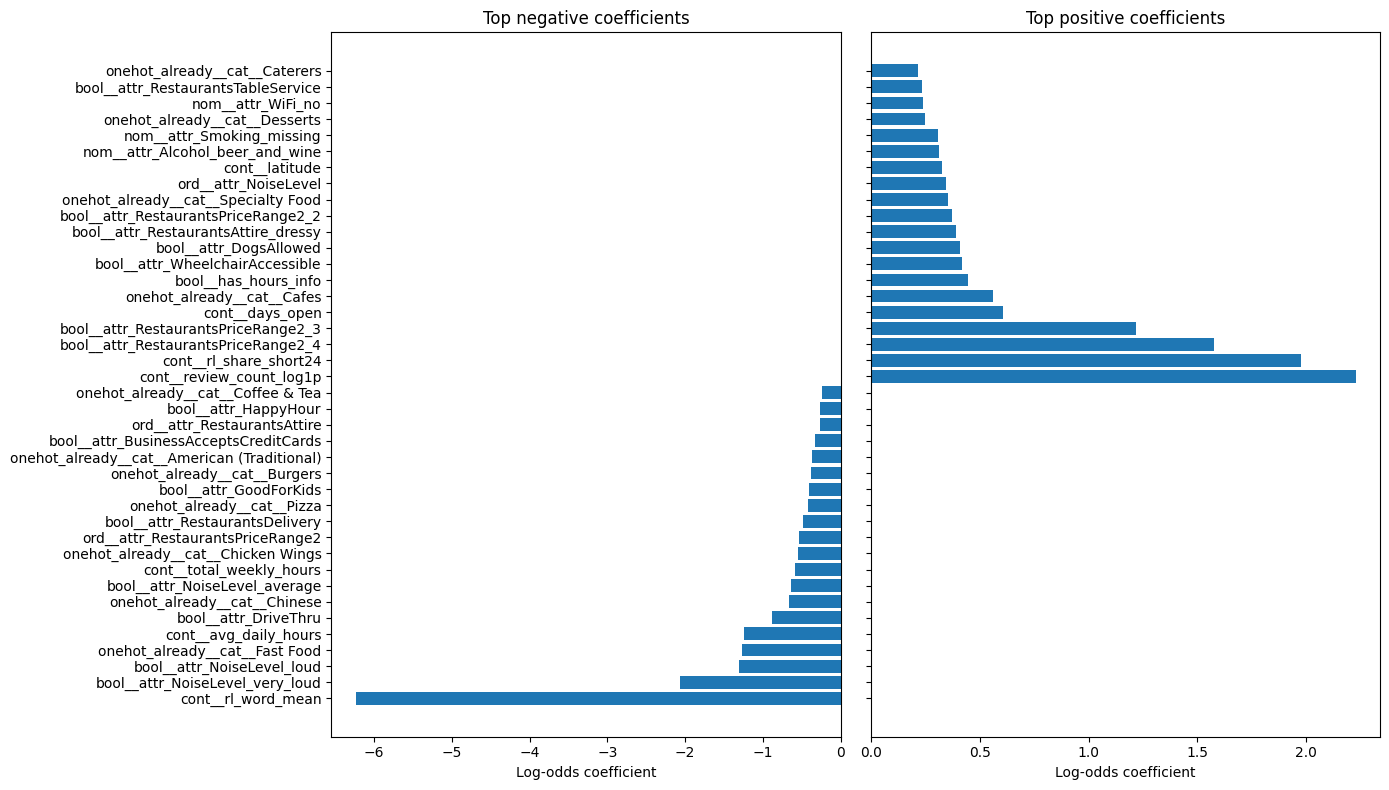

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# train/validation split just for visualization
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y_cls, test_size=0.2, stratify=y_cls, random_state=42)

# make sure the preprocessor returns pandas so we keep column names
logit_pipe.set_output(transform="pandas")
logit_pipe.fit(X_tr, y_tr)

# processed feature names and coefficients
Xtr_proc      = logit_pipe.named_steps["prep"].transform(X_tr)
feature_names = Xtr_proc.columns
coefs         = logit_pipe.named_steps["lr"].coef_.ravel()

coef_df = pd.DataFrame({"feature": feature_names, "coef": coefs})
coef_df["abs_coef"] = coef_df["coef"].abs()

# top +/- features
top_pos = coef_df.sort_values("coef", ascending=False).head(20)
top_neg = coef_df.sort_values("coef", ascending=True).head(20)

fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
axes[0].barh(top_neg["feature"], top_neg["coef"]); axes[0].set_title("Top negative coefficients")
axes[1].barh(top_pos["feature"], top_pos["coef"]); axes[1].set_title("Top positive coefficients")
for ax in axes: ax.invert_yaxis(); ax.set_xlabel("Log-odds coefficient")
plt.tight_layout(); plt.show()


In [41]:
# Add odds ratio column
coef_df["odds_ratio"] = np.exp(coef_df["coef"])

# Show top positive/negative features with odds ratios
top_pos = coef_df.sort_values("coef", ascending=False).head(20)
top_neg = coef_df.sort_values("coef", ascending=True).head(20)

print("Top positive features (odds ratios):")
print(top_pos[["feature", "coef", "odds_ratio"]])

print("\nTop negative features (odds ratios):")
print(top_neg[["feature", "coef", "odds_ratio"]])


Top positive features (odds ratios):
                                feature      coef  odds_ratio
2              cont__review_count_log1p  2.227699    9.278490
4                cont__rl_share_short24  1.974641    7.204030
40  bool__attr_RestaurantsPriceRange2_4  1.575882    4.835006
39  bool__attr_RestaurantsPriceRange2_3  1.219297    3.384809
6                       cont__days_open  0.608583    1.837825
66           onehot_already__cat__Cafes  0.562636    1.755294
37                 bool__has_hours_info  0.448319    1.565679
27      bool__attr_WheelchairAccessible  0.420799    1.523178
32               bool__attr_DogsAllowed  0.410713    1.507892
45  bool__attr_RestaurantsAttire_dressy  0.390796    1.478156
38  bool__attr_RestaurantsPriceRange2_2  0.371434    1.449813
69  onehot_already__cat__Specialty Food  0.354399    1.425323
10                 ord__attr_NoiseLevel  0.343308    1.409603
0                        cont__latitude  0.326065    1.385506
16      nom__attr_Alcohol_beer_an

### 2) ROC curve, Precision–Recall curve, and Confusion Matrix
These evaluate how well the classifier separates the classes.

<Figure size 600x500 with 0 Axes>

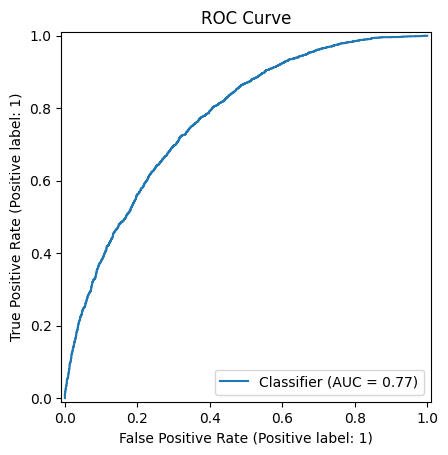

<Figure size 600x500 with 0 Axes>

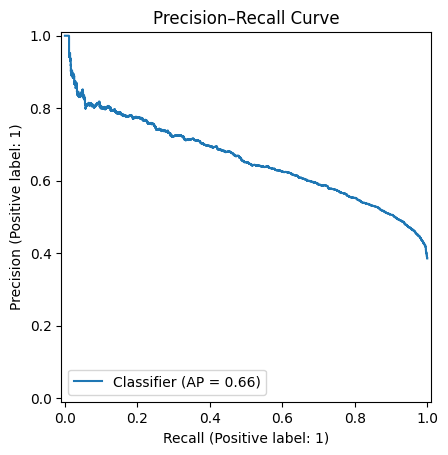

<Figure size 600x500 with 0 Axes>

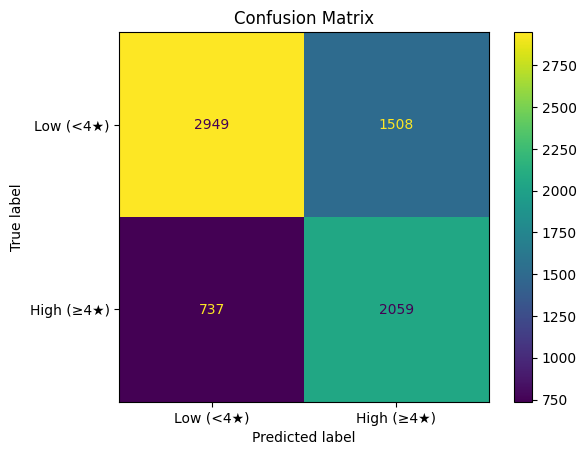

In [42]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay

# Probabilities on the holdout set
y_score = logit_pipe.predict_proba(X_te)[:, 1]

plt.figure(figsize=(6,5))
RocCurveDisplay.from_predictions(y_te, y_score)
plt.title("ROC Curve"); plt.show()

plt.figure(figsize=(6,5))
PrecisionRecallDisplay.from_predictions(y_te, y_score)
plt.title("Precision–Recall Curve"); plt.show()

plt.figure(figsize=(6,5))
ConfusionMatrixDisplay.from_estimator(logit_pipe, X_te, y_te,
                                      display_labels=["Low (<4★)", "High (≥4★)"],
                                      normalize=None)
plt.title("Confusion Matrix"); plt.show()


### 3) Calibrated probabilities


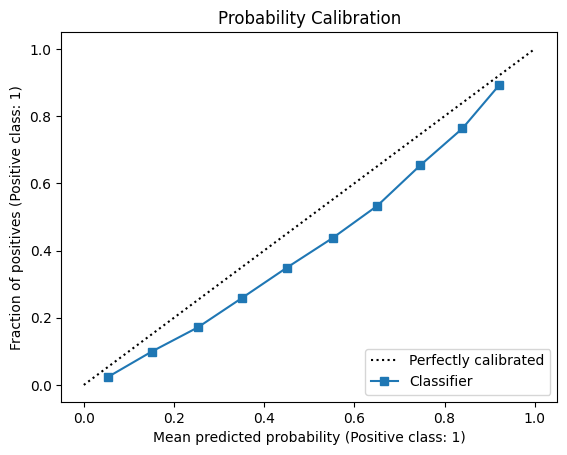

In [43]:
from sklearn.calibration import CalibrationDisplay
CalibrationDisplay.from_predictions(y_te, y_score, n_bins=10)
plt.title("Probability Calibration"); plt.show()


## From coefficient → odds ratio

In [44]:
# Add odds ratio column
coef_df["odds_ratio"] = np.exp(coef_df["coef"])

# Show top positive/negative features with odds ratios
top_pos = coef_df.sort_values("coef", ascending=False).head(20)
top_neg = coef_df.sort_values("coef", ascending=True).head(20)

print("Top positive features (odds ratios):")
print(top_pos[["feature", "coef", "odds_ratio"]])

print("\nTop negative features (odds ratios):")
print(top_neg[["feature", "coef", "odds_ratio"]])


Top positive features (odds ratios):
                                feature      coef  odds_ratio
2              cont__review_count_log1p  2.227699    9.278490
4                cont__rl_share_short24  1.974641    7.204030
40  bool__attr_RestaurantsPriceRange2_4  1.575882    4.835006
39  bool__attr_RestaurantsPriceRange2_3  1.219297    3.384809
6                       cont__days_open  0.608583    1.837825
66           onehot_already__cat__Cafes  0.562636    1.755294
37                 bool__has_hours_info  0.448319    1.565679
27      bool__attr_WheelchairAccessible  0.420799    1.523178
32               bool__attr_DogsAllowed  0.410713    1.507892
45  bool__attr_RestaurantsAttire_dressy  0.390796    1.478156
38  bool__attr_RestaurantsPriceRange2_2  0.371434    1.449813
69  onehot_already__cat__Specialty Food  0.354399    1.425323
10                 ord__attr_NoiseLevel  0.343308    1.409603
0                        cont__latitude  0.326065    1.385506
16      nom__attr_Alcohol_beer_an

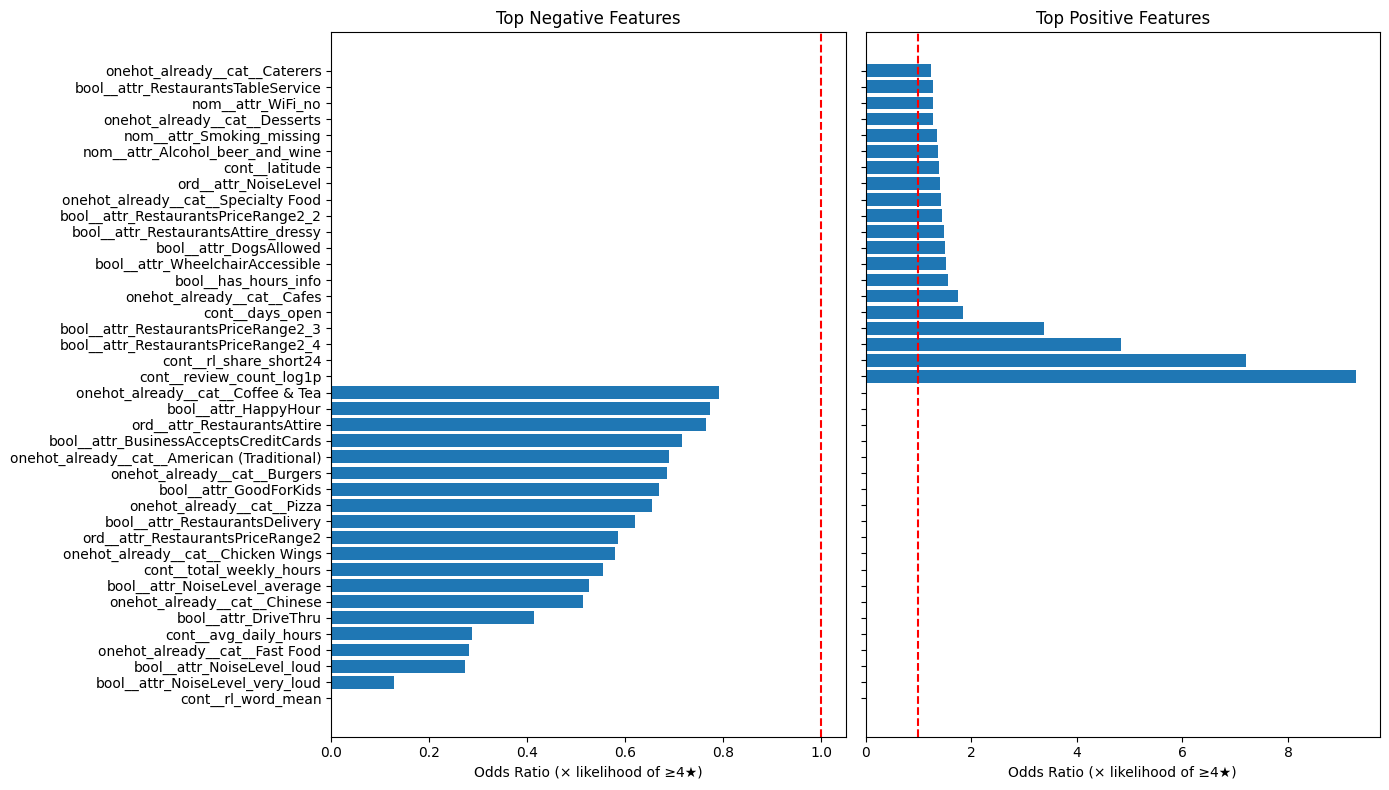

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Extract feature names and coefficients
Xtr_proc      = logit_pipe.named_steps["prep"].transform(X_tr)
feature_names = Xtr_proc.columns
coefs         = logit_pipe.named_steps["lr"].coef_.ravel()

# --- Build dataframe with odds ratios
coef_df = pd.DataFrame({"feature": feature_names, "coef": coefs})
coef_df["odds_ratio"] = np.exp(coef_df["coef"])  # exponentiate

# --- Sort features
top_pos = coef_df.sort_values("odds_ratio", ascending=False).head(20)
top_neg = coef_df.sort_values("odds_ratio", ascending=True).head(20)

# --- Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

# Left: features that reduce odds (<1)
axes[0].barh(top_neg["feature"], top_neg["odds_ratio"])
axes[0].axvline(x=1.0, color="red", linestyle="--")
axes[0].set_title("Top Negative Features")
axes[0].set_xlabel("Odds Ratio (× likelihood of ≥4★)")

# Right: features that increase odds (>1)
axes[1].barh(top_pos["feature"], top_pos["odds_ratio"])
axes[1].axvline(x=1.0, color="red", linestyle="--")
axes[1].set_title("Top Positive Features")
axes[1].set_xlabel("Odds Ratio (× likelihood of ≥4★)")

for ax in axes:
    ax.invert_yaxis()

plt.tight_layout()
plt.show()
